# Linear Regression on Rise in Sea Levels

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
# Read CSV file into Pandas DataFrame
sea_lvl = pd.read_csv('climate_data.csv')
sea_lvl.head()

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Date1,Month,diff_pressure
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0,...,4.0,27.0,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0,...,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0,...,8.0,35.0,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0,...,7.0,35.0,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.0,0.0,...,5.0,13.0,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665


In [3]:
sea_lvl = sea_lvl.rename(columns={"Average windspeed (mph)":"avg_windspeed", "Maximum pressure":"Max_Pressure"})

In [4]:
# Assign the data to X and y
X = sea_lvl.avg_windspeed.values.reshape(-1, 1)
y = sea_lvl.Max_Pressure.values.reshape(-1,1)


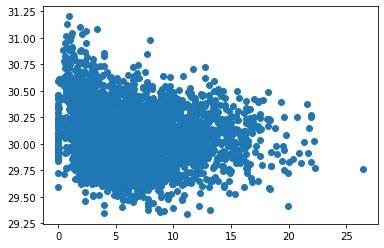

In [5]:
# Plot the data

plt.scatter(X,y)

In [6]:
# BEGIN SOLUTION

model = LinearRegression()


In [7]:
model.fit(X, y)

LinearRegression()

In [8]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-0.00643255]]
y-axis intercept:  [30.08249489]


In [9]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[0.]]
Max X Value: [[26.4]]


In [10]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

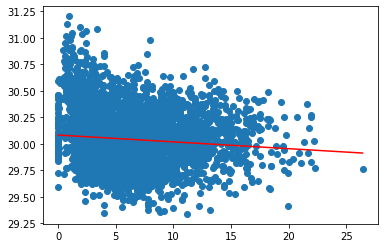

In [11]:
plt.scatter(X, y)
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [12]:
# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.06594986242346751
R-squared (R2 ): 0.010047177484988734


In [13]:
# Overall Score for the model
model.score(X, y)

0.010047177484988734

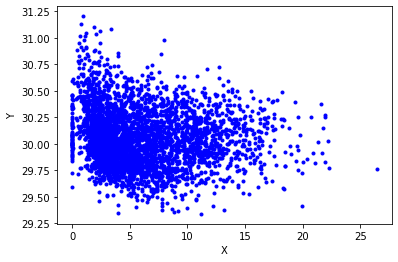

In [14]:
#equation used -> y = 0.8x^2 + 0.9x + 2
#visualize the data
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [16]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

-0.0008911692589959053


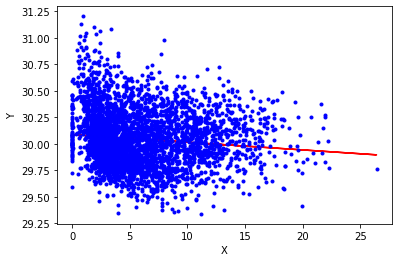

In [17]:
plt.plot(x_train, lr.predict(x_train), color="r")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [18]:
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.02885463346770245


In [19]:
print(lr.coef_)
print(lr.intercept_)

[[ 0.         -0.03462651  0.00170769]]
[30.160237]


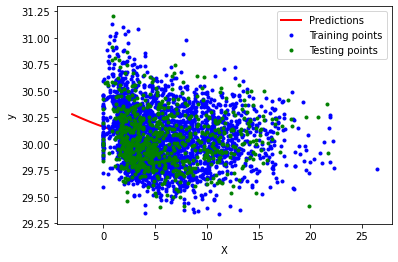

In [20]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)
RandomForestRegressor(...)
print(regr.predict([[0, 0, 0, 0]]))


[-8.32987858]


In [22]:
import seaborn as sns

In [23]:
sea_lvl.drop(columns=(["Date", "Date1"]), inplace=True)

<AxesSubplot:>

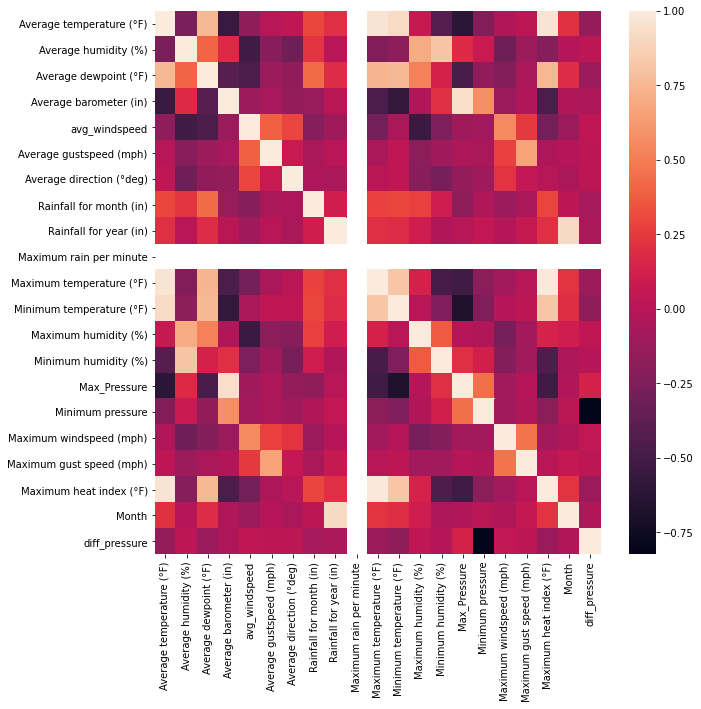

In [24]:
plt.figure(figsize= (10,10))
sns.heatmap(sea_lvl.corr())

In [25]:
import time

start = time.time()
sns.FacetGrid(sea_lvl, col="Rainfall for year (in)", row="Average temperature (°F)")
end = time.time()
print(end - start)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000018C42F0D430> (for post_execute):


KeyboardInterrupt: 